In [71]:
import numpy as np
import pandas as pd
import re
import nltk
import contractions
from nltk.corpus import stopwords

file_path = r"C:\Users\ryan_\OneDrive\Desktop\Bipolar\Data\bipolar_dataset.csv"

# Define column names based on the first line of the file
with open(file_path, "r") as f:
    columns = f.readline().strip().split(";")

# Read the file into a DataFrame
df = pd.read_csv(file_path, sep=";", skiprows=1, header=None, encoding='latin1')

# Assign column names
df.columns = columns

# Display the DataFrame
pd.set_option('display.max_columns', None)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Columns: 350 entries, subreddit to tfidf_year
dtypes: int64(77), object(273)
memory usage: 4.5+ MB


In [72]:
df.head()

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,lix,smog_index,wiener_sachtextformel,n_chars,n_long_words,n_monosyllable_words,n_polysyllable_words,n_sents,n_syllables,n_unique_words,n_words,sent_neg,sent_neu,sent_pos,sent_compound,economic_stress_total,isolation_total,substance_use_total,guns_total,domestic_stress_total,suicidality_total,punctuation,liwc_1st_pers,liwc_2nd_pers,liwc_3rd_pers,liwc_achievement,liwc_adverbs,liwc_affective_processes,liwc_anger,liwc_anxiety,liwc_articles_article,liwc_assent,liwc_auxiliary_verbs,liwc_biological,liwc_body,liwc_causation,liwc_certainty,liwc_cognitive,liwc_common_verbs,liwc_conjunctions,liwc_death,liwc_discrepancy,liwc_exclusive,liwc_family,liwc_feel,liwc_fillers,liwc_friends,liwc_future_tense,liwc_health,liwc_hear,liwc_home,liwc_humans,liwc_impersonal_pronouns,liwc_inclusive,liwc_ingestion,liwc_inhibition,liwc_insight,liwc_leisure,liwc_money,liwc_motion,liwc_negations,liwc_negative_emotion,liwc_nonfluencies,liwc_numbers,liwc_past_tense,liwc_perceptual_processes,liwc_personal_pronouns,liwc_positive_emotion,liwc_prepositions,liwc_present_tense,liwc_quantifiers,liwc_relativity,liwc_religion,liwc_sadness,liwc_see,liwc_sexual,liwc_social_processes,liwc_space,liwc_swear_words,liwc_tentative,liwc_time,liwc_total_functional,liwc_total_pronouns,liwc_work,tfidf_abl,tfidf_abus,tfidf_actual,tfidf_addict,tfidf_adhd,tfidf_advic,tfidf_ago,tfidf_alcohol,tfidf_almost,tfidf_alon,tfidf_alreadi,tfidf_also,tfidf_alway,tfidf_amp,tfidf_amp x200b,tfidf_ani,tfidf_anoth,tfidf_anxieti,tfidf_anxious,tfidf_anymor,tfidf_anyon,tfidf_anyon els,tfidf_anyth,tfidf_around,tfidf_ask,tfidf_attack,tfidf_away,tfidf_back,tfidf_bad,tfidf_becaus,tfidf_becom,tfidf_befor,tfidf_believ,tfidf_best,tfidf_better,tfidf_bit,tfidf_bodi,tfidf_bpd,tfidf_brain,tfidf_call,tfidf_came,tfidf_care,tfidf_caus,tfidf_chang,tfidf_come,tfidf_complet,tfidf_constant,tfidf_control,tfidf_could,tfidf_coupl,tfidf_cri,tfidf_day,tfidf_deal,tfidf_depress,tfidf_diagnos,tfidf_die,tfidf_differ,tfidf_disord,tfidf_doctor,tfidf_doe,tfidf_done,tfidf_dont,tfidf_drink,tfidf_drug,tfidf_eat,tfidf_els,tfidf_emot,tfidf_end,tfidf_enough,tfidf_etc,tfidf_even,tfidf_ever,tfidf_everi,tfidf_everyon,tfidf_everyth,tfidf_experi,tfidf_famili,tfidf_fear,tfidf_feel,tfidf_feel like,tfidf_felt,tfidf_final,tfidf_find,tfidf_first,tfidf_food,tfidf_found,tfidf_friend,tfidf_fuck,tfidf_get,tfidf_give,tfidf_go,tfidf_good,tfidf_got,tfidf_great,tfidf_guess,tfidf_guy,tfidf_happen,tfidf_happi,tfidf_hard,tfidf_hate,tfidf_head,tfidf_health,tfidf_hear,tfidf_heart,tfidf_help,tfidf_high,tfidf_home,tfidf_hope,tfidf_hour,tfidf_hous,tfidf_hurt,tfidf_idea,tfidf_im,tfidf_issu,tfidf_job,tfidf_keep,tfidf_kill,tfidf_kind,tfidf_know,tfidf_last,tfidf_late,tfidf_leav,tfidf_left,tfidf_let,tfidf_life,tfidf_like,tfidf_littl,tfidf_live,tfidf_long,tfidf_look,tfidf_lose,tfidf_lost,tfidf_lot,tfidf_love,tfidf_made,tfidf_make,tfidf_mani,tfidf_mayb,tfidf_mean,tfidf_med,tfidf_medic,tfidf_mental,tfidf_might,tfidf_mind,tfidf_mom,tfidf_month,tfidf_move,tfidf_much,tfidf_need,tfidf_never,tfidf_new,tfidf_next,tfidf_night,tfidf_normal,tfidf_noth,tfidf_notic,tfidf_old,tfidf_onc,tfidf_one,tfidf_onli,tfidf_pain,tfidf_panic,tfidf_parent,tfidf_part,tfidf_past,tfidf_peopl,tfidf_person,tfidf_place,tfidf_pleas,tfidf_point,tfidf_possibl,tfidf_post,tfidf_pretti,tfidf_probabl,tfidf_problem,tfidf_ptsd,tfidf_put,tfidf_question,tfidf_quit,tfidf_read,tfidf_real,tfidf_realli,tfidf_reason,tfidf_recent,tfidf_relationship,tfidf_rememb,tfidf_right,tfidf_said,tfidf_say,tfidf_scare,tfidf_school,tfidf_see,tfidf_seem,tfidf_self,tfidf_sever,tfidf_shit,tfidf_sinc,tfidf_situat,tfidf_sleep,tfidf_social,tfidf_someon,tfidf_someth,tfidf_sometim,tfidf_sorri,tfidf_start,tfidf_stay,tfidf_still,tfidf_stop,tfidf_stress,tfidf_struggl,tfidf_stuff,tfidf_suicid,tfidf_support,tfidf_sure,tfidf_symptom,tfidf_take,tfidf_talk,tfidf_tell,tfidf_thank,tfidf_therapi,tfidf

In [73]:
'''Cleaning Text'''
def expand_contractions(text):
    # Define your custom_contractions dictionary here
    custom_contractions = {
        "ain't": "am not are not is not has not have not",
        "aren't": "are not",
        "can't": "cannot",
        "could've": "could have",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he had he would",
        "he'll": "he shall he will",
        "he's": "he has he is",
        "I'd": "I had I would",
        "I'll": "I shall I will",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it had it would",
        "it'll": "it shall it will",
        "it's": "it has it is",
        "let's": "let us",
        "mightn't": "might not",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she had she would",
        "she'll": "she shall she will",
        "she's": "she has she is",
        "should've": "should have",
        "shouldn't": "should not",
        "that's": "that has that is",
        "there's": "there has there is",
        "they'd": "they had they would",
        "they'll": "they shall they will",
        "they're": "they are",
        "they've": "they have",
        "wasn't": "was not",
        "we'd": "we had we would",
        "we'll": "we shall we will",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what shall what will",
        "what're": "what are",
        "what's": "what has what is",
        "what've": "what have",
        "where's": "where has where is",
        "who'd": "who had who would",
        "who'll": "who shall who will",
        "who're": "who are",
        "who's": "who has who is",
        "who've": "who have",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you had you would",
        "you'll": "you shall you will",
        "you're": "you are",
        "you've": "you have",
    
    }
    # Replace contractions with their expansions
    for contraction, expansion in custom_contractions.items():
        text = text.replace(contraction, expansion)
    return text

df['post'] = df.iloc[ :,3].apply(expand_contractions)


def clean_text(text):
    text = text.replace("/", " or ")
    text = re.sub(r'[^a-zA-Z\s]','', text) #removes punctuation and special characters
    text = text.lower()#makes everything lower case
    return text
df['post'] = df.iloc[ :,3].apply(clean_text)
df.head()


,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,lix,smog_index,wiener_sachtextformel,n_chars,n_long_words,n_monosyllable_words,n_polysyllable_words,n_sents,n_syllables,n_unique_words,n_words,sent_neg,sent_neu,sent_pos,sent_compound,economic_stress_total,isolation_total,substance_use_total,guns_total,domestic_stress_total,suicidality_total,punctuation,liwc_1st_pers,liwc_2nd_pers,liwc_3rd_pers,liwc_achievement,liwc_adverbs,liwc_affective_processes,liwc_anger,liwc_anxiety,liwc_articles_article,liwc_assent,liwc_auxiliary_verbs,liwc_biological,liwc_body,liwc_causation,liwc_certainty,liwc_cognitive,liwc_common_verbs,liwc_conjunctions,liwc_death,liwc_discrepancy,liwc_exclusive,liwc_family,liwc_feel,liwc_fillers,liwc_friends,liwc_future_tense,liwc_health,liwc_hear,liwc_home,liwc_humans,liwc_impersonal_pronouns,liwc_inclusive,liwc_ingestion,liwc_inhibition,liwc_insight,liwc_leisure,liwc_money,liwc_motion,liwc_negations,liwc_negative_emotion,liwc_nonfluencies,liwc_numbers,liwc_past_tense,liwc_perceptual_processes,liwc_personal_pronouns,liwc_positive_emotion,liwc_prepositions,liwc_present_tense,liwc_quantifiers,liwc_relativity,liwc_religion,liwc_sadness,liwc_see,liwc_sexual,liwc_social_processes,liwc_space,liwc_swear_words,liwc_tentative,liwc_time,liwc_total_functional,liwc_total_pronouns,liwc_work,tfidf_abl,tfidf_abus,tfidf_actual,tfidf_addict,tfidf_adhd,tfidf_advic,tfidf_ago,tfidf_alcohol,tfidf_almost,tfidf_alon,tfidf_alreadi,tfidf_also,tfidf_alway,tfidf_amp,tfidf_amp x200b,tfidf_ani,tfidf_anoth,tfidf_anxieti,tfidf_anxious,tfidf_anymor,tfidf_anyon,tfidf_anyon els,tfidf_anyth,tfidf_around,tfidf_ask,tfidf_attack,tfidf_away,tfidf_back,tfidf_bad,tfidf_becaus,tfidf_becom,tfidf_befor,tfidf_believ,tfidf_best,tfidf_better,tfidf_bit,tfidf_bodi,tfidf_bpd,tfidf_brain,tfidf_call,tfidf_came,tfidf_care,tfidf_caus,tfidf_chang,tfidf_come,tfidf_complet,tfidf_constant,tfidf_control,tfidf_could,tfidf_coupl,tfidf_cri,tfidf_day,tfidf_deal,tfidf_depress,tfidf_diagnos,tfidf_die,tfidf_differ,tfidf_disord,tfidf_doctor,tfidf_doe,tfidf_done,tfidf_dont,tfidf_drink,tfidf_drug,tfidf_eat,tfidf_els,tfidf_emot,tfidf_end,tfidf_enough,tfidf_etc,tfidf_even,tfidf_ever,tfidf_everi,tfidf_everyon,tfidf_everyth,tfidf_experi,tfidf_famili,tfidf_fear,tfidf_feel,tfidf_feel like,tfidf_felt,tfidf_final,tfidf_find,tfidf_first,tfidf_food,tfidf_found,tfidf_friend,tfidf_fuck,tfidf_get,tfidf_give,tfidf_go,tfidf_good,tfidf_got,tfidf_great,tfidf_guess,tfidf_guy,tfidf_happen,tfidf_happi,tfidf_hard,tfidf_hate,tfidf_head,tfidf_health,tfidf_hear,tfidf_heart,tfidf_help,tfidf_high,tfidf_home,tfidf_hope,tfidf_hour,tfidf_hous,tfidf_hurt,tfidf_idea,tfidf_im,tfidf_issu,tfidf_job,tfidf_keep,tfidf_kill,tfidf_kind,tfidf_know,tfidf_last,tfidf_late,tfidf_leav,tfidf_left,tfidf_let,tfidf_life,tfidf_like,tfidf_littl,tfidf_live,tfidf_long,tfidf_look,tfidf_lose,tfidf_lost,tfidf_lot,tfidf_love,tfidf_made,tfidf_make,tfidf_mani,tfidf_mayb,tfidf_mean,tfidf_med,tfidf_medic,tfidf_mental,tfidf_might,tfidf_mind,tfidf_mom,tfidf_month,tfidf_move,tfidf_much,tfidf_need,tfidf_never,tfidf_new,tfidf_next,tfidf_night,tfidf_normal,tfidf_noth,tfidf_notic,tfidf_old,tfidf_onc,tfidf_one,tfidf_onli,tfidf_pain,tfidf_panic,tfidf_parent,tfidf_part,tfidf_past,tfidf_peopl,tfidf_person,tfidf_place,tfidf_pleas,tfidf_point,tfidf_possibl,tfidf_post,tfidf_pretti,tfidf_probabl,tfidf_problem,tfidf_ptsd,tfidf_put,tfidf_question,tfidf_quit,tfidf_read,tfidf_real,tfidf_realli,tfidf_reason,tfidf_recent,tfidf_relationship,tfidf_rememb,tfidf_right,tfidf_said,tfidf_say,tfidf_scare,tfidf_school,tfidf_see,tfidf_seem,tfidf_self,tfidf_sever,tfidf_shit,tfidf_sinc,tfidf_situat,tfidf_sleep,tfidf_social,tfidf_someon,tfidf_someth,tfidf_sometim,tfidf_sorri,tfidf_start,tfidf_stay,tfidf_still,tfidf_stop,tfidf_stress,tfidf_struggl,tfidf_stuff,tfidf_suicid,tfidf_support,tfidf_sure,tfidf_symptom,tfidf_take,tfidf_talk,tfidf_tell,tfidf_thank,tfidf_therapi,tfidf

In [74]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)


def tokenize(text):
    tokenized = text.apply(nltk.word_tokenize)
    return tokenized
nltk.download('wordnet')

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatize_text_series(series):
    lemmatizer = WordNetLemmatizer()
    
    def lemmatize_text(text):
        lemmatized_tokens = []
        for token, tag in nltk.pos_tag(nltk.word_tokenize(text)):
            pos_tag = tag[0].lower()
            pos_tag = pos_tag if pos_tag in ['a', 'r', 'n', 'v'] else None  # Map POS tags to WordNet POS tags
            if not pos_tag:
                lemmatized_tokens.append(token)
            else:
                lemma = lemmatizer.lemmatize(token, pos_tag)
                lemmatized_tokens.append(lemma)
        return ' '.join(lemmatized_tokens)
    
    return series.apply(lemmatize_text)

df['post'] = df.iloc[ :,3].apply(remove_stopwords, tokenize)

# Sample data
data = pd.Series(df['post'])

# Apply lemmatization to the series
lemmatized_data = lemmatize_text_series(data)
df['post'] = lemmatized_data
posts = df['post']




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryan_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryan_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ryan_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryan_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ryan_\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ryan_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ry

In [75]:
print(df.iloc[4,3])

unable stop talk idea experience hey know come find particularly time anxiety can not stop say thing loud even thought necessarily part conversation random sentence etc sound insane home holiday start confuse family know diagnosis experience anything particular help


In [76]:
"""Finding Correlations between liwc_columns and tfidf_columns"""
liwc_columns = [col for col in df.columns if 'liwc_' in col] 
tfidf_columns = [col for col in df.columns if 'tfidf_' in col]
for col in df.columns:
    if 'liwc_' in col or 'tfidf_' in col:
        df[col] = df[col].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)


print("LIWC Score Statistics:")
for col in liwc_columns:
    liwc_stats = df[col].describe()
    print(f"\n{col}:")
    for stat_name,value in liwc_stats.items():
        print(f"{stat_name.capitalize()}: {value}")




LIWC Score Statistics:

liwc_1st_pers:
Count: 1692.0
Mean: 0.39361702127659576
Std: 1.226518311979646
Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 16.0

liwc_2nd_pers:
Count: 1692.0
Mean: 1.16548463356974
Std: 3.6110141242699947
Min: 0.0
25%: 0.0
50%: 0.0
75%: 2.0
Max: 126.0

liwc_3rd_pers:
Count: 1692.0
Mean: 0.83274231678487
Std: 1.9857067726977864
Min: 0.0
25%: 0.0
50%: 0.0
75%: 1.0
Max: 42.0

liwc_achievement:
Count: 1692.0
Mean: 2.3120567375886525
Std: 3.0916642704693826
Min: 0.0
25%: 0.0
50%: 1.0
75%: 3.0
Max: 62.0

liwc_adverbs:
Count: 1692.0
Mean: 8.73404255319149
Std: 8.952609283323818
Min: 0.0
25%: 3.0
50%: 6.0
75%: 12.0
Max: 151.0

liwc_affective_processes:
Count: 1692.0
Mean: 9.471040189125295
Std: 10.770702452682768
Min: 0.0
25%: 3.0
50%: 7.0
75%: 12.0
Max: 257.0

liwc_anger:
Count: 1692.0
Mean: 1.1081560283687943
Std: 2.045781086138022
Min: 0.0
25%: 0.0
50%: 0.0
75%: 1.0
Max: 29.0

liwc_anxiety:
Count: 1692.0
Mean: 0.8971631205673759
Std: 1.5175118885016272
Min: 0.0
25%: 0.0


In [77]:
print("TFIDF Score Statistics:")
for col in tfidf_columns:
    tfidf_stats = df[col].describe()
    print(f"\n{col}:")
    for stat_name,value in tfidf_stats.items():
        print(f"{stat_name.capitalize()}: {value}")

TFIDF Score Statistics:

tfidf_abl:
Count: 1692.0
Mean: 1.1754870788416076e+20
Std: 4.848348334172659e+20
Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 5.96858e+21

tfidf_abus:
Count: 1692.0
Mean: 2.5913115543735226e+19
Std: 2.5455667056349046e+20
Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 5.32696e+21

tfidf_actual:
Count: 1692.0
Mean: 9.945742872340426e+19
Std: 4.3583767654879474e+20
Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 5.75424e+21

tfidf_addict:
Count: 1692.0
Mean: 1.6037382978723404e+19
Std: 1.4884356723788254e+20
Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 2.50307e+21

tfidf_adhd:
Count: 1692.0
Mean: 2.689534875886525e+19
Std: 2.1193665161182527e+20
Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 3.59253e+21

tfidf_advic:
Count: 1692.0
Mean: 9.350619970449172e+19
Std: 4.019530979692556e+20
Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 6.23641e+21

tfidf_ago:
Count: 1692.0
Mean: 1.2779416566784872e+20
Std: 4.5442557035237664e+20
Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 6.05434e+21

tfidf_alcohol:
Cou

In [78]:
for liwc_col in liwc_columns:
    for tfidf_col in tfidf_columns:
        correlation=df[liwc_col].corr(df[tfidf_col])
        print(f"\nCorrelation between {liwc_col} and {tfidf_col}: {correlation: .2f}")


Correlation between liwc_1st_pers and tfidf_abl:  0.13

Correlation between liwc_1st_pers and tfidf_abus:  0.10

Correlation between liwc_1st_pers and tfidf_actual:  0.02

Correlation between liwc_1st_pers and tfidf_addict:  0.00

Correlation between liwc_1st_pers and tfidf_adhd:  0.01

Correlation between liwc_1st_pers and tfidf_advic: -0.00

Correlation between liwc_1st_pers and tfidf_ago:  0.06

Correlation between liwc_1st_pers and tfidf_alcohol:  0.02

Correlation between liwc_1st_pers and tfidf_almost:  0.06

Correlation between liwc_1st_pers and tfidf_alon:  0.06

Correlation between liwc_1st_pers and tfidf_alreadi:  0.12

Correlation between liwc_1st_pers and tfidf_also:  0.14

Correlation between liwc_1st_pers and tfidf_alway:  0.07

Correlation between liwc_1st_pers and tfidf_amp:  0.00

Correlation between liwc_1st_pers and tfidf_amp x200b:  0.02

Correlation between liwc_1st_pers and tfidf_ani:  0.06

Correlation between liwc_1st_pers and tfidf_anoth:  0.10

Correlation be

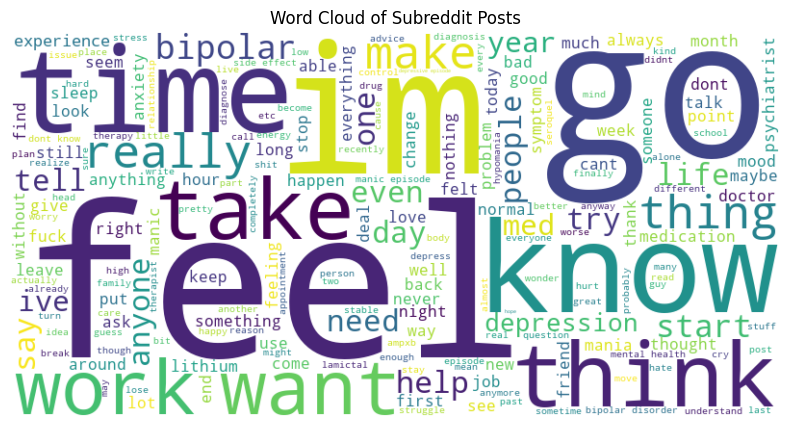

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(posts.explode()))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Subreddit Posts')
plt.show()

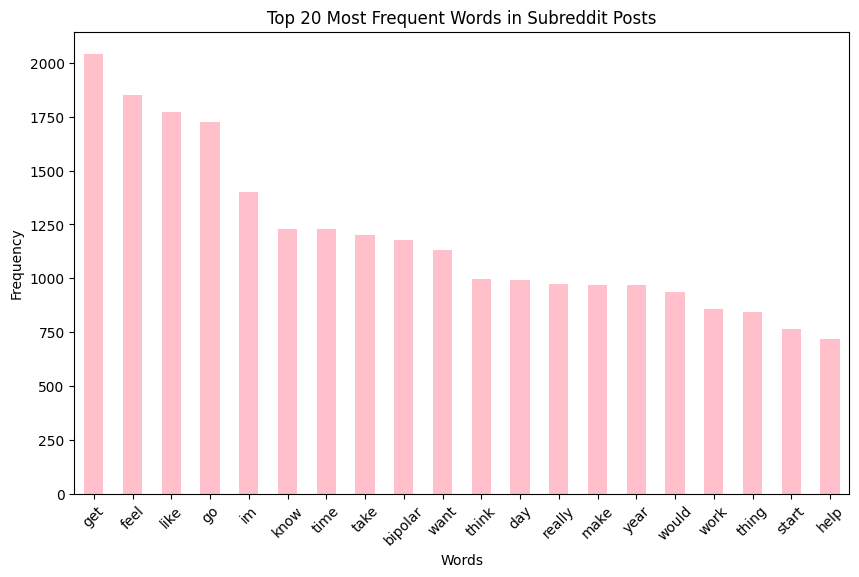

In [80]:
word_freq = pd.Series(' '.join(posts.explode()).split()).value_counts()[:20]
word_freq.plot(kind='bar', figsize=(10, 6), color ='pink')
plt.title('Top 20 Most Frequent Words in Subreddit Posts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

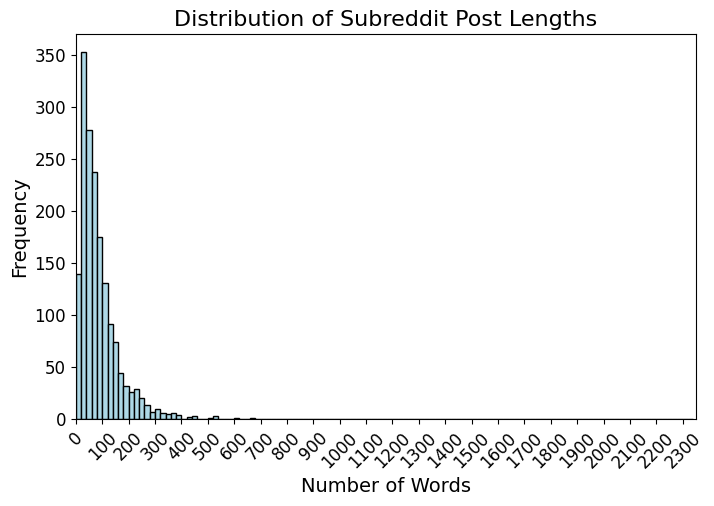

In [81]:
post_lengths = posts.apply(lambda x: len(word_tokenize(x)))
plt.figure(figsize=(8, 5))
plt.hist(post_lengths, bins=range(0, max(post_lengths) + 1, 20), color='lightblue', edgecolor='black')

plt.title('Distribution of Subreddit Post Lengths', fontsize=16)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize tick marks and labels
plt.xticks(range(0, max(post_lengths) + 1, 100), fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Set axis limits
plt.xlim(0, max(post_lengths))
# Set axis limits
plt.xlim(0, max(post_lengths))

# Show grid
plt.grid(False)

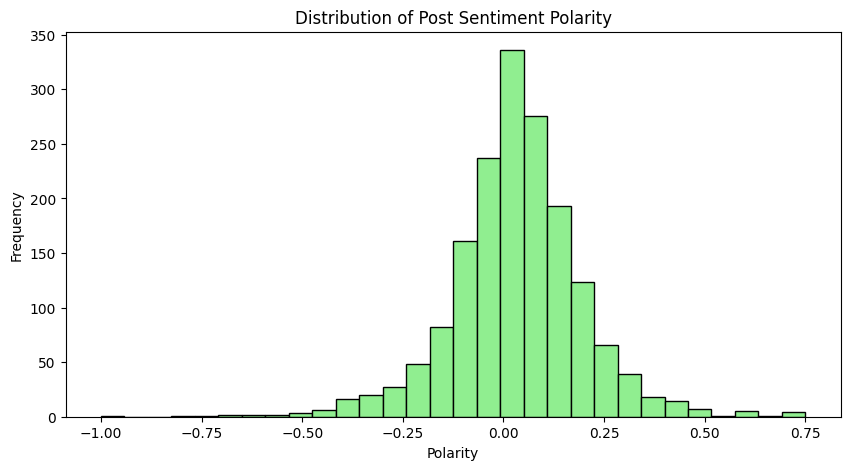

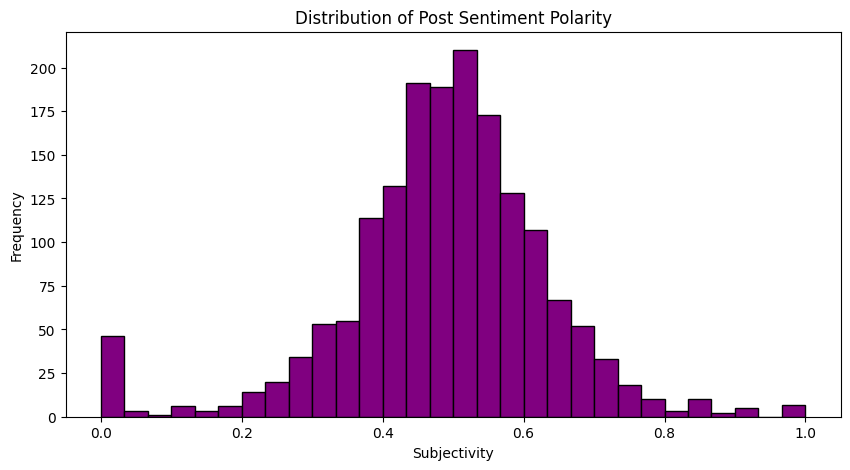

In [82]:
from textblob import TextBlob
sentiments = posts.apply(lambda x: TextBlob(x).sentiment)
polarity_values = sentiments.apply(lambda x: x.polarity)
subjectivity_values = sentiments.apply(lambda x: x.subjectivity)

plt.figure(figsize=(10,5))
plt.hist(polarity_values, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Post Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(subjectivity_values, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Post Sentiment Polarity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()



In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')